<a href="https://colab.research.google.com/github/IkaLailatuzzahro/PCVK_genap_2021/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/drive')



Mounted at /content/drive


 Mengubah tingkat kecerahan citra
----------------------------------
Masukkan nilai kecerahan: 50


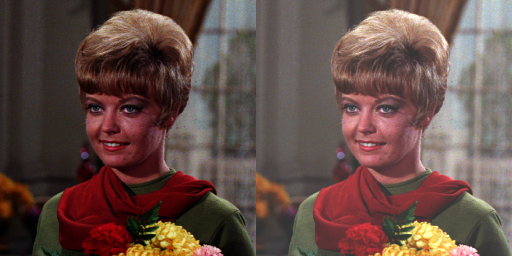

In [7]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mengubah tingkat kecerahan citra')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/pcvk/female.tiff')
brightness_image = np.zeros(original.shape,original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[x,y,c] = np.clip(original[x,y,c] + brightness, 0, 255)

#cara simpel tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta-brigthness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukkan tingkat kecerahan[-255 - 255]: 60
Masukkan kontras [1.0 - 3.0]1.5


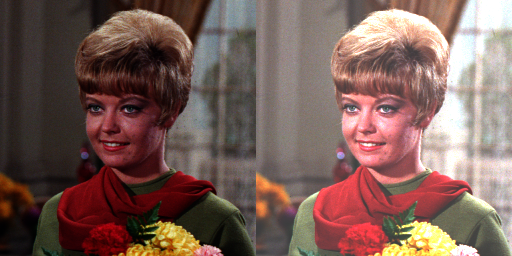

In [8]:
# Tugas no 1

print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------------------')
try :
  brightness = int(input('Masukkan tingkat kecerahan[-255 - 255]: '))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]'))
except ValueError:
  print('Error, not a number')


original = cv.imread('/content/drive/MyDrive/pcvk/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)


final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

 mengubah tingkat kecerahan citra dengan transform log 
 -------------------------------- 
Masukan nilai kecerahan: 40


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


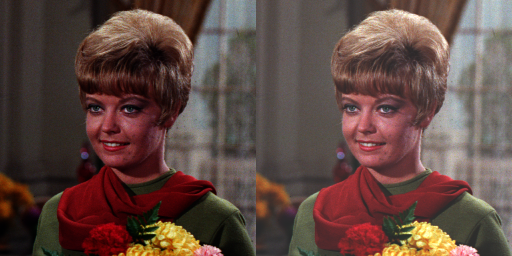

In [13]:
#tugas no 2

import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
print(' mengubah tingkat kecerahan citra dengan transform log ')
print(' -------------------------------- ')

try:
  brightness = int(input('Masukan nilai kecerahan: '))
except ValueError:
  print('Error, bukan angka')

original = cv.imread('/content/drive/MyDrive/pcvk/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# Apply log transformation method 
c = 255 / np.log(1 + np.max(brightness_image)) 
log_image = c * (np.log(brightness_image + 1)) 
log_image = np.array(brightness_image, dtype = np.uint8)

#cara simple tanpa loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, log_image))
cv2_imshow(final_frame)

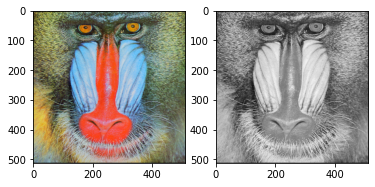

In [16]:
#Tugas no 3a
# Averaging
#Average Brightness = ( R + G +B ) : 3
import matplotlib.pylab as plt

img = cv.imread('/content/drive/MyDrive/pcvk/mandrill.tiff')
color_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#cara 1
gray_img = np.mean(color_img, axis=2)
#axis=2 argument tells numpy.mean() to average values across all three color channels
#axis=0 would average across pixel rows
#axis=1 would average across pixel columns

#cara 2
'''for y in range(original.shape[0]):
    for x in range(original.shape[1]):
          gray_img[y,x] = np.mean(color_img[y,x])'''

f, axarr = plt.subplots(1,2) #membuat 2 plot untuk satu citra input dan output
axarr[0].imshow(color_img)
axarr[1].imshow(gray_img, cmap='gray')

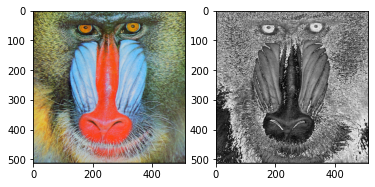

In [17]:
#Tugas no 3b
#Lightness = 0.5 * (Max[R,G,B]+ min[R,G,B])
#ekstrasi  3 warna channels
#image[x,y,z]

R, G, B =color_img[:, :, 0], color_img[:, :, 1], color_img[:, :, 2]
max_channels = np.maximum(np.maximum(R, G), B) #np.max(color_img, axis=2)
min_channels = np.minimum(np.minimum(R, G), B) #np.min(color_img, axis=2)

gray_img = 0.5 * (max_channels + min_channels)

f, axarr = plt.subplots(1,2) #membuat 2 plot untuk satu citra input dan output
axarr[0].imshow(color_img)
axarr[1].imshow(gray_img, cmap='gray')

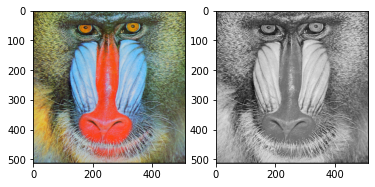

In [18]:
#Tugas no 3c
#Luminance = (0.2126 * R ) + (0.7152 * G) + (0.0722 * B)
#ekstraksi 3 channels  warna

R, G, B =color_img[:, :, 0], color_img[:, :, 1], color_img[:, :, 2]

gray_img = (0.2126 * R ) + (0.7152 * G) + (0.0722 * B)

f, axarr = plt.subplots(1,2) #membuat 2 plot untuk satu citra input dan output
axarr[0].imshow(color_img)
axarr[1].imshow(gray_img, cmap='gray')

In [ ]:
#Tugas no 4